<a href="https://colab.research.google.com/github/joooser/TENSORFLOW2/blob/main/Tumor_classiffier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/platzi-tf2/TumorClassification.zip

--2022-06-29 21:47:02--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 142.250.65.80, 142.250.188.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/platzi-tf2/TumorClassification.zip’

/tmp/platzi-tf2/Tum 100%[===================>]   7.11M  --.-KB/s    in 0.1s    

2022-06-29 21:47:03 (53.8 MB/s) - ‘/tmp/platzi-tf2/TumorClassification.zip’ saved [7460028/7460028]



In [2]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/platzi-tf2/TumorClassification.zip

--2022-06-29 21:47:04--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.48, 172.217.2.112, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/platzi-tf2/TumorClassification.zip’

/tmp/platzi-tf2/Tum 100%[===================>]   7.11M  --.-KB/s    in 0.06s   

2022-06-29 21:47:04 (127 MB/s) - ‘/tmp/platzi-tf2/TumorClassification.zip’ saved [7460028/7460028]



In [3]:
import os
import zipfile

In [4]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/platzi-tf2/TumorClassification.zip

--2022-06-29 21:47:05--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/platzi-tf2/TumorClassification.zip’

/tmp/platzi-tf2/Tum 100%[===================>]   7.11M  --.-KB/s    in 0.04s   

2022-06-29 21:47:05 (176 MB/s) - ‘/tmp/platzi-tf2/TumorClassification.zip’ saved [7460028/7460028]



In [5]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/platzi-tf2/TumorClassification.zip

--2022-06-29 21:47:05--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.250.81.208, 142.250.188.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/platzi-tf2/TumorClassification.zip’

/tmp/platzi-tf2/Tum 100%[===================>]   7.11M  --.-KB/s    in 0.03s   

2022-06-29 21:47:05 (243 MB/s) - ‘/tmp/platzi-tf2/TumorClassification.zip’ saved [7460028/7460028]



In [6]:
local_zip = "/tmp/platzi-tf2/TumorClassification.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/platzi-tf2")
zip_ref.close()

In [7]:
initial_count = 0
dir = "/tmp/platzi-tf2/Train/NORMAL/"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)

350


In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import requests as requests
from PIL import Image
from io import BytesIO
import codecs
import json


In [9]:
train_dir = "/tmp/platzi-tf2/Train"
test_dir = "/tmp/platzi-tf2/Test"

In [10]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.28)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (56, 56),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (56, 56),
    batch_size = 64,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (56, 56),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 1050 images belonging to 3 classes.
Found 39 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [12]:
classes = ["BENIGN", "MALIGNANT", "NORMAL"]

In [13]:
classes

['BENIGN', 'MALIGNANT', 'NORMAL']

In [14]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

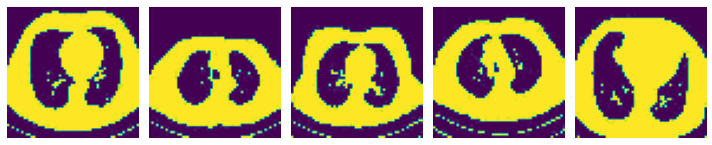

In [15]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[10:15])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

In [17]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest',
)

In [19]:
i = 0 
for batch in datagen.flow_from_directory(train_dir, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 10 == 0 :
        break

plt.show()        

Found 1050 images belonging to 3 classes.


ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [20]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (56, 56, 1)),
              tf.keras.layers.Dense(18, activation = "relu"),
              tf.keras.layers.Dense(6, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [21]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 18)                56466     
                                                                 
 dense_1 (Dense)             (None, 6)                 114       
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 56,601
Trainable params: 56,601
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_base.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ['accuracy'])


history = model_base.fit(
    train_generator, 
    epochs= 20, 
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 1s 77ms/step - loss: 1.0715 - accuracy: 0.4124 - val_loss: 0.8357 - val_accuracy: 0.6410
Epoch 2/20
9/9 [==============================] - 1s 59ms/step - loss: 0.9518 - accuracy: 0.5057 - val_loss: 0.8158 - val_accuracy: 0.6410
Epoch 3/20
9/9 [==============================] - 1s 59ms/step - loss: 0.8618 - accuracy: 0.5400 - val_loss: 0.7782 - val_accuracy: 0.5897
Epoch 4/20
9/9 [==============================] - 1s 58ms/step - loss: 0.8013 - accuracy: 0.5829 - val_loss: 0.8671 - val_accuracy: 0.6154
Epoch 5/20
9/9 [==============================] - 1s 60ms/step - loss: 0.7427 - accuracy: 0.6190 - val_loss: 0.8659 - val_accuracy: 0.6154
Epoch 6/20
9/9 [==============================] - 1s 61ms/step - loss: 0.6955 - accuracy: 0.6352 - val_loss: 0.8695 - val_accuracy: 0.6154
Epoch 7/20
9/9 [==============================] - 1s 61ms/step - loss: 0.6519 - accuracy: 0.6448 - val_loss: 0.8993 - val_accuracy: 0.6667
Epoch 8/20
9/9 [===========

In [23]:
results = model_base.evaluate(test_generator)

2/2 [==============================] - 0s 13ms/step - loss: 1.1958 - accuracy: 0.6667


In [24]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

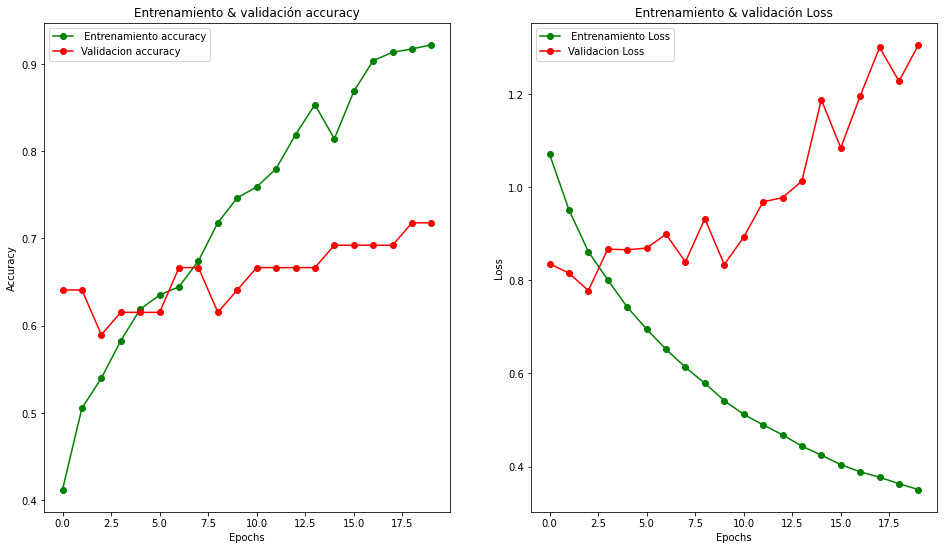

In [25]:
visualizacion_resultados(history)

In [26]:
from tensorflow.keras import regularizers

In [27]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (56, 56, 1)),
              tf.keras.layers.Dense(12, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.3),
              tf.keras.layers.Dense(6, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_optimizer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 12)                37644     
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 37,743
Trainable params: 37,743
Non-trai

In [28]:
model_optimizer.compile(optimizer= "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 1s 85ms/step - loss: 1.0854 - accuracy: 0.3990 - val_loss: 0.9942 - val_accuracy: 0.6410
Epoch 2/20
9/9 [==============================] - 1s 61ms/step - loss: 1.0133 - accuracy: 0.4286 - val_loss: 0.9222 - val_accuracy: 0.6923
Epoch 3/20
9/9 [==============================] - 1s 60ms/step - loss: 1.0038 - accuracy: 0.4429 - val_loss: 0.9631 - val_accuracy: 0.6923
Epoch 4/20
9/9 [==============================] - 1s 58ms/step - loss: 0.9383 - accuracy: 0.4914 - val_loss: 0.9247 - val_accuracy: 0.5641
Epoch 5/20
9/9 [==============================] - 1s 67ms/step - loss: 0.8865 - accuracy: 0.5190 - val_loss: 0.7828 - val_accuracy: 0.5897
Epoch 6/20
9/9 [==============================] - 1s 57ms/step - loss: 0.8472 - accuracy: 0.5286 - val_loss: 0.8790 - val_accuracy: 0.5897
Epoch 7/20
9/9 [==============================] - 1s 59ms/step - loss: 0.7995 - accuracy: 0.5743 - val_loss: 0.8161 - val_accuracy: 0.6154
Epoch 8/20
9/9 [===========

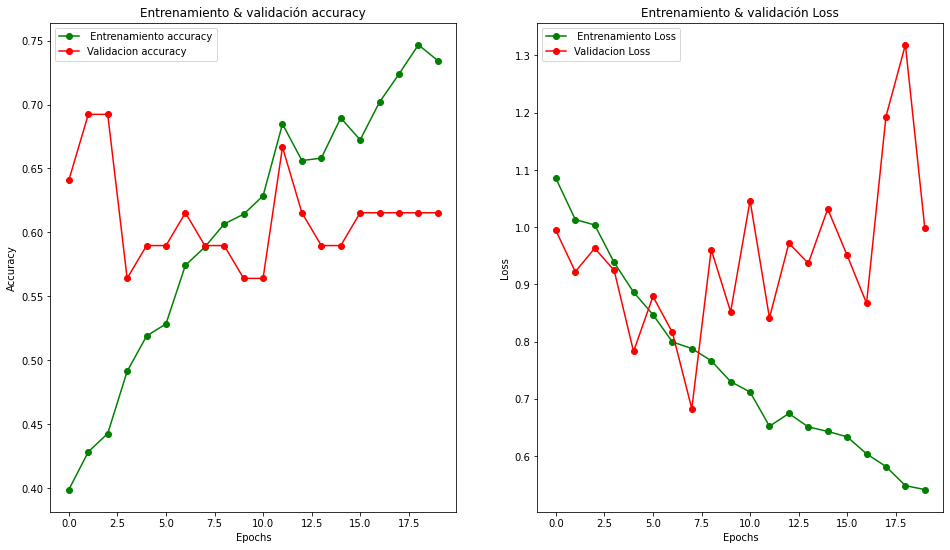

In [29]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

visualizacion_resultados(history_optimizer)

convoluciones


In [30]:
model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(32, (4,4), activation = "relu", input_shape= (56, 56, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.08),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.08),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.summary()

model_convolutional.compile(optimizer= "Nadam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 53, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 32)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 21632)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               5538048   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

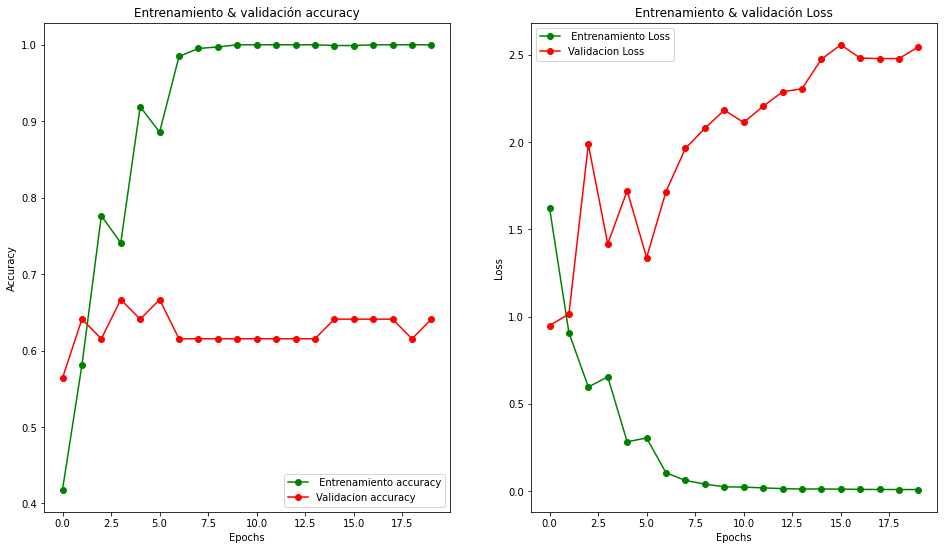

In [31]:
visualizacion_resultados(history_convolutional)

CALLBACKS

In [32]:
model_callback = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (56, 56, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_callback.summary()

model_callback.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 54, 54, 75)        750       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 75)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 54675)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               13997056  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                      

In [33]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.999:
      print("Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento")
      self.model.stop_training = True

In [34]:
callback = TrainingCallback()

history_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 7s 647ms/step - loss: 2.0669 - accuracy: 0.3667 - val_loss: 1.0159 - val_accuracy: 0.3846
Epoch 2/20
9/9 [==============================] - 6s 615ms/step - loss: 1.1092 - accuracy: 0.4695 - val_loss: 0.9396 - val_accuracy: 0.5897
Epoch 3/20
9/9 [==============================] - 6s 613ms/step - loss: 0.8898 - accuracy: 0.5943 - val_loss: 0.9341 - val_accuracy: 0.4615
Epoch 4/20
9/9 [==============================] - 6s 614ms/step - loss: 0.7595 - accuracy: 0.6790 - val_loss: 1.0852 - val_accuracy: 0.5897
Epoch 5/20
9/9 [==============================] - 6s 675ms/step - loss: 0.5883 - accuracy: 0.7714 - val_loss: 1.1501 - val_accuracy: 0.6410
Epoch 6/20
9/9 [==============================] - 6s 619ms/step - loss: 0.4272 - accuracy: 0.8381 - val_loss: 1.2409 - val_accuracy: 0.6154
Epoch 7/20
9/9 [==============================] - 6s 617ms/step - loss: 0.2770 - accuracy: 0.9076 - val_loss: 1.2568 - val_accuracy: 0.6154
Epoch 8/20
9/9 [====

In [35]:
def get_model():
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (56, 56, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
  ])
  return model

model_early = get_model()
model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 54, 54, 75)        750       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 75)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 54675)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               13997056  
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                      

early stopping

In [36]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience=3, mode = "auto")

In [37]:
history_early = model_early.fit(
    train_generator, 
    epochs= 20, 
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 7s 716ms/step - loss: 2.6283 - accuracy: 0.3743 - val_loss: 1.0727 - val_accuracy: 0.5385
Epoch 2/20
9/9 [==============================] - 6s 633ms/step - loss: 1.2111 - accuracy: 0.4343 - val_loss: 1.0236 - val_accuracy: 0.3077
Epoch 3/20
9/9 [==============================] - 6s 624ms/step - loss: 0.9500 - accuracy: 0.5248 - val_loss: 0.9619 - val_accuracy: 0.4872
Epoch 4/20
9/9 [==============================] - 6s 622ms/step - loss: 0.8272 - accuracy: 0.6352 - val_loss: 0.9591 - val_accuracy: 0.5897
Epoch 5/20
9/9 [==============================] - 6s 615ms/step - loss: 0.6717 - accuracy: 0.7343 - val_loss: 0.9947 - val_accuracy: 0.6154
Epoch 6/20
9/9 [==============================] - 7s 734ms/step - loss: 0.5413 - accuracy: 0.7848 - val_loss: 1.0810 - val_accuracy: 0.6667
Epoch 7/20
9/9 [==============================] - 6s 693ms/step - loss: 0.3660 - accuracy: 0.8981 - val_loss: 1.2592 - val_accuracy: 0.6410
Epoch 8/20
9/9 [====

## Creamos nuestra modelo funcional con Auto Tunner Keras

In [38]:
!pip install -q -U keras-tuner
import keras_tuner as kt
from tensorflow import keras

     |████████████████████████████████| 133 kB 27.9 MB/s 


In [39]:
def constructor_modelos(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(64, (3,3), activation= "relu", input_shape = (56, 56, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int("units", min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units=hp_units,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(128,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax"))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model

In [40]:
tuner = kt.Hyperband(
    constructor_modelos,
    objective = "val_accuracy",
    max_epochs = 30,
    factor = 3,
    directory = "models/",
    project_name = "tunner")

In [42]:
tuner.search(train_generator, epochs =20, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials =5)[0]

Trial 64 Complete [00h 00m 36s]
val_accuracy: 0.6410256624221802

Best val_accuracy So Far: 0.8205128312110901
Total elapsed time: 00h 23m 45s
INFO:tensorflow:Oracle triggered exit


In [43]:
print(best_hps.get("units"))

64


In [44]:
print(best_hps.get("learning_rate"))

0.01


In [46]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodel = hypermodel.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 4s 427ms/step - loss: 4.6573 - accuracy: 0.3686 - val_loss: 1.1289 - val_accuracy: 0.3333
Epoch 2/20
9/9 [==============================] - 5s 575ms/step - loss: 1.1414 - accuracy: 0.3476 - val_loss: 1.1510 - val_accuracy: 0.3846
Epoch 3/20
9/9 [==============================] - 3s 306ms/step - loss: 1.1588 - accuracy: 0.3248 - val_loss: 1.1599 - val_accuracy: 0.3846
Epoch 4/20
9/9 [==============================] - 3s 302ms/step - loss: 1.1637 - accuracy: 0.3552 - val_loss: 1.1621 - val_accuracy: 0.3846
Epoch 5/20
9/9 [==============================] - 3s 312ms/step - loss: 1.1645 - accuracy: 0.3238 - val_loss: 1.1641 - val_accuracy: 0.2821


## Guardar únicamente arquitectura del modelo

In [47]:
config_dict = hypermodel.get_config()

In [48]:
print(config_dict)

{'name': 'sequential_2', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 56, 56, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_2_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_2', 'trainable': True, 'batch_input_shape': (None, 56, 56, 1), 'dtype': 'float32', 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_2', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}}, 

## Crear un nuevo modelo desde la arquitectura

In [49]:
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [50]:
model_same_config.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 54, 54, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 46656)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                2986048   
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                      

## Guardar y cargar unicamente los pesos


In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [52]:
model_weight = get_model()
model_weight.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 54, 54, 75)        750       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 75)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 54675)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               13997056  
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                      

In [53]:
model_weight.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [54]:
# Creamos unos checkpoint de nuestros modelos con TensorFlow, verbose: mostrar mas información
checkpoint_path = "model_checpoints/checkpoint"
checkpoint_weighs= ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = True,
    verbose = 1

)

In [55]:
# Entrenamos el modelo, y almacenamos en cada steps los pesos del moedelo.
history_weight = model_weight.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)


Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 2.1253 - accuracy: 0.4029
Epoch 1: saving model to model_checpoints/checkpoint
9/9 [==============================] - 7s 695ms/step - loss: 2.1253 - accuracy: 0.4029 - val_loss: 0.9897 - val_accuracy: 0.6667
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 1.0954 - accuracy: 0.4762
Epoch 2: saving model to model_checpoints/checkpoint
9/9 [==============================] - 6s 676ms/step - loss: 1.0954 - accuracy: 0.4762 - val_loss: 0.9674 - val_accuracy: 0.4872
Epoch 3/20
9/9 [==============================] - ETA: 0s - loss: 0.8748 - accuracy: 0.6019
Epoch 3: saving model to model_checpoints/checkpoint
9/9 [==============================] - 6s 668ms/step - loss: 0.8748 - accuracy: 0.6019 - val_loss: 0.9152 - val_accuracy: 0.5641
Epoch 4/20
9/9 [==============================] - ETA: 0s - loss: 0.6998 - accuracy: 0.6990
Epoch 4: saving model to model_checpoints/checkpoint
9/9 [============================

#### Guardamos los pesos de forma manual

In [56]:
model_weight.save_weights("model_manul/my_model")

#### Creamos la arquitectura y cargamos los pesos

In [57]:
model_weights2 = get_model()
model_weights2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [58]:
model_weights2.load_weights(checkpoint_path)


In [59]:
model_weights2.evaluate(test_generator)

2/2 [==============================] - 1s 41ms/step - loss: 2.3335 - accuracy: 0.6042


[2.3334624767303467, 0.6041666865348816]

In [60]:
model_weight.evaluate(test_generator)

2/2 [==============================] - 0s 44ms/step - loss: 2.3335 - accuracy: 0.6042


[2.3334622383117676, 0.6041666865348816]

## Criterios para almacenar modelos
#### Almacenar infraestructura y peso

In [61]:
checkpoint_path = "model_checpoints_complete"
checkpoint_weighs= ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = False,
    monitor = "val_accuracy",
    save_best_only = True,
    verbose = 1

)

In [62]:
model_complete = get_model()
model_complete.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_complete = model_complete.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 1.4550 - accuracy: 0.4429
Epoch 1: val_accuracy improved from -inf to 0.51282, saving model to model_checpoints_complete
INFO:tensorflow:Assets written to: model_checpoints_complete/assets
9/9 [==============================] - 8s 840ms/step - loss: 1.4550 - accuracy: 0.4429 - val_loss: 0.9202 - val_accuracy: 0.5128
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.9425 - accuracy: 0.5724
Epoch 2: val_accuracy improved from 0.51282 to 0.58974, saving model to model_checpoints_complete
INFO:tensorflow:Assets written to: model_checpoints_complete/assets
9/9 [==============================] - 18s 2s/step - loss: 0.9425 - accuracy: 0.5724 - val_loss: 0.9305 - val_accuracy: 0.5897
Epoch 3/20
9/9 [==============================] - ETA: 0s - loss: 0.7130 - accuracy: 0.6943
Epoch 3: val_accuracy did not improve from 0.58974
9/9 [==============================] - 6s 629ms/step - loss: 0.7130 - accuracy: 0.6943 -

#### Almacenar infraestructura y peso manual

In [63]:
model_complete.save("saved_model_complete/mymodel")

INFO:tensorflow:Assets written to: saved_model_complete/mymodel/assets


#### Cargamos nuestro modelo completo

In [64]:
model_complete3 = tf.keras.models.load_model("saved_model_complete/mymodel")

In [65]:
model_complete3.evaluate(test_generator)

2/2 [==============================] - 0s 40ms/step - loss: 2.4665 - accuracy: 0.6181


[2.4665439128875732, 0.6180555820465088]

In [66]:
model_complete.evaluate(test_generator)

2/2 [==============================] - 0s 40ms/step - loss: 2.4665 - accuracy: 0.6181


[2.4665439128875732, 0.6180555820465088]

#### Usar el formato .h5 para guardar modelos
Hierarchical Data Format (HDF5 format)

In [67]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
model_complete3.save("my_model.h5")

In [69]:
model_complete4 = tf.keras.models.load_model("my_model.h5")